In [2]:
import numpy as np

lang_results = {}

for lang in ["c", "rust"]:
    import_times = []
    meta_times = []

    for i in range(30):
        results = []
        if lang == "c":
            results = !./test.sh c
        else:
            results = !./test.sh rust
        result_pairs = [tuple([int(y) for y in x.split(" ")]) for x in results]
        [imports, meta] = prs = list(zip(*result_pairs))
        imports = list(imports)
        meta = list(meta)
        import_times.append(imports)
        meta_times.append(meta)
        print(imports)
        print(meta)

    import_times = np.array(import_times)
    meta_times = np.array(meta_times)

    avg_import_times = np.mean(import_times, axis=0)
    avg_meta_times = np.mean(meta_times, axis=0)

    lang_results[lang] = (avg_import_times, avg_meta_times)

print(lang_results)

[12555, 13560, 10802, 13075, 14715, 14407, 13333, 16681, 17838, 16264, 16513, 20025, 27381, 24122, 28922, 27927, 33890, 31156, 20303, 21482, 21097]
[121, 183, 164, 308, 282, 298, 446, 447, 621, 730, 735, 1040, 1682, 1734, 1629, 1734, 2048, 1660, 1621, 1659, 1855]
[17521, 14255, 16601, 14905, 13468, 13378, 11460, 11802, 13228, 13091, 16813, 14230, 17643, 17108, 16417, 17213, 16336, 17544, 15102, 13965, 17793]
[159, 190, 185, 347, 327, 306, 499, 484, 593, 629, 671, 625, 824, 875, 949, 1034, 1025, 1030, 1205, 1050, 1370]
[10381, 11512, 12430, 9762, 10921, 9548, 12401, 12843, 13510, 14332, 14571, 14649, 14830, 18195, 17323, 17945, 16933, 21169, 20469, 28322, 23585]
[108, 172, 144, 253, 255, 262, 413, 409, 527, 593, 642, 674, 832, 831, 992, 1029, 1192, 1356, 1661, 1984, 2283]
[16782, 15147, 14235, 12185, 12914, 12650, 15267, 12479, 13456, 12938, 13488, 13036, 14053, 16048, 14561, 13613, 15004, 15684, 14183, 14259, 16019]
[142, 202, 194, 283, 286, 290, 504, 442, 583, 603, 616, 570, 743, 735,

[12522.6        12630.53333333 13139.9        12396.73333333
 12065.4        12270.         13475.93333333 13618.83333333
 14272.96666667 14539.76666667 14797.63333333 14332.9
 16001.93333333 16569.5        17210.83333333 17261.2
 17441.43333333 17482.23333333 16178.06666667 16512.
 16829.23333333]
[ 121.86666667  169.63333333  169.86666667  294.8         284.
  293.56666667  462.4         464.93333333  578.8         650.63333333
  663.03333333  661.26666667  870.16666667  881.          980.76666667
 1100.26666667 1120.16666667 1108.9        1301.6        1301.16666667
 1453.13333333]
[135747.7        128773.73333333 135428.43333333 130530.6
 137301.16666667 136775.96666667 139163.6        143950.76666667
 137476.56666667 142621.8        146762.5        146041.36666667
 149425.76666667 148963.8        144941.23333333 156724.56666667
 151432.53333333 159146.1        160951.33333333 156308.63333333
 161736.        ]
[ 511.76666667  758.73333333 1009.03333333 1283.56666667 1579.73333333
 

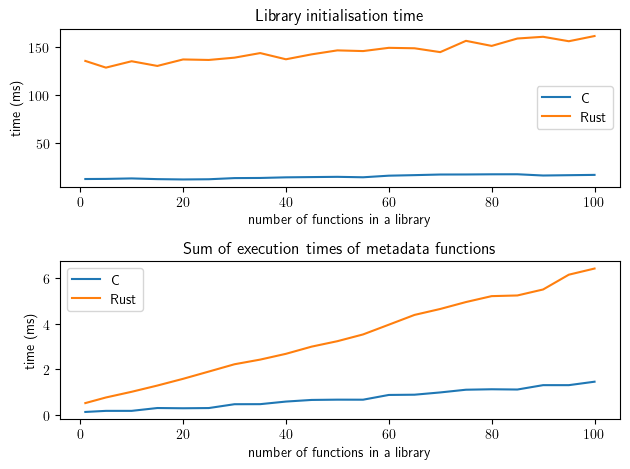

In [3]:
from matplotlib import pyplot as plt

x_axis = list([1, *range(5, 101, 5)])
plt.rcParams.update({
    "text.usetex": True,
})

c_avg_import_times, c_avg_meta_times = lang_results["c"]
rust_avg_import_times, rust_avg_meta_times = lang_results["rust"]
print(c_avg_import_times)
print(c_avg_meta_times)
print(rust_avg_import_times)
print(rust_avg_meta_times)

fig, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(x_axis, c_avg_import_times / 1000, color="C0", label="C")
ax1.plot(x_axis, rust_avg_import_times / 1000, color="C1", label="Rust")
ax2.plot(x_axis, c_avg_meta_times / 1000, color="C0", label="C")
ax2.plot(x_axis, rust_avg_meta_times / 1000, color="C1", label="Rust")
ax1.set_xlabel("number of functions in a library")
ax2.set_xlabel("number of functions in a library")
ax1.set_ylabel("time (ms)")
ax2.set_ylabel("time (ms)")
ax1.set_title("Library initialisation time")
ax2.set_title("Sum of execution times of metadata functions")
ax1.legend()
ax2.legend()
plt.tight_layout()
plt.savefig("import_overhead.pdf")
plt.show()